In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_data = pd.read_csv('BostonHousing.csv') #read the data


In [212]:
my_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [213]:
#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [214]:
#panda---->numpy
#setting the matrixes
X = my_data.iloc[:,0:13]#right now size (507,14)----->on concatenating (507,15)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)#axis=1 means column

y = my_data.iloc[:,13:14].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,14])

#set hyper parameters
alpha = 0.01
iters = 1000

In [215]:
theta.shape

(1, 14)

In [216]:
X

array([[ 1.        , -0.41936693,  0.28454827, ..., -1.45755797,
         0.44061589, -1.07449897],
       [ 1.        , -0.41692667, -0.48724019, ..., -0.3027945 ,
         0.44061589, -0.49195252],
       [ 1.        , -0.416929  , -0.48724019, ..., -0.3027945 ,
         0.39603507, -1.20753241],
       ...,
       [ 1.        , -0.41303783, -0.48724019, ...,  1.17530274,
         0.44061589, -0.98207574],
       [ 1.        , -0.40736095, -0.48724019, ...,  1.17530274,
         0.40282626, -0.86444617],
       [ 1.        , -0.41458988, -0.48724019, ...,  1.17530274,
         0.44061589, -0.66839688]])

In [250]:
y.shape

(506, 1)

In [218]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [219]:
computeCost(X,y,theta)

0.49901185770750955

In [259]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)#axis=0 means row
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)
print(g.shape)



[[-1.48857650e-15 -8.49715420e-02  8.83016702e-02 -2.97754563e-02
   8.08272991e-02 -1.71481808e-01  3.14546960e-01 -1.12883903e-02
  -2.98327906e-01  1.58703006e-01 -9.59722395e-02 -2.12440782e-01
   9.49431049e-02 -3.96433320e-01]]
0.13102184197075575
(1, 14)


Text(0.5, 1.0, 'Error vs. Training Epoch')

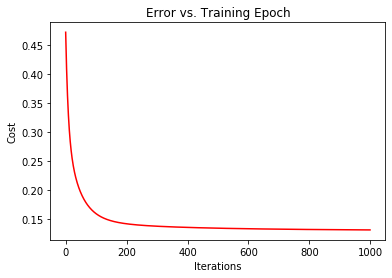

In [252]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  


In [262]:
predictions=np.dot(g,X.T)
predictions


array([[ 8.76852969e-01,  2.63962140e-01,  8.92574425e-01,
         7.00980418e-01,  6.33634405e-01,  3.15001836e-01,
         5.01083321e-02, -3.17608840e-01, -1.18979852e+00,
        -3.76671615e-01, -3.58762383e-01, -9.77243342e-02,
        -1.65806241e-01, -2.82127056e-01, -3.19290743e-01,
        -3.14854472e-01, -1.67142476e-01, -5.75985203e-01,
        -6.68006309e-01, -4.30323816e-01, -1.07314019e+00,
        -5.03416229e-01, -6.90844278e-01, -9.22659901e-01,
        -7.12850814e-01, -9.69862827e-01, -7.35685048e-01,
        -8.11182077e-01, -2.77721448e-01, -1.28943046e-01,
        -1.17273442e+00, -4.60436901e-01, -1.44624303e+00,
        -8.81033841e-01, -9.30983893e-01,  1.03741890e-01,
        -5.36929069e-02,  4.63447641e-02,  3.50725971e-02,
         8.95509292e-01,  1.21980468e+00,  6.14969520e-01,
         2.88321036e-01,  2.28031562e-01,  2.89806088e-02,
        -8.31859924e-02, -2.55321810e-01, -5.13341951e-01,
        -1.48799146e+00, -6.03195816e-01, -1.66667332e-0

In [224]:
x_trainnum=0.8*(X.shape[0])
x_testnum=0.2*(X.shape[0])
print(x_trainnum)
print(x_testnum)

404.8
101.2


In [225]:
trainnum=405
testnum=101

In [226]:
x_train=my_data.iloc[0:405,0:13]
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)#axis=1 means column

y_train=my_data.iloc[0:405,13:14].values
x_test=my_data.iloc[405:507,0:13]
ones = np.ones([x_test.shape[0],1])
x_test = np.concatenate((ones,x_test),axis=1)#axis=1 means column
y_test=my_data.iloc[405:507,13:14].values
print(X.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(theta.shape)

(506, 14)
(506, 1)
(405, 14)
(101, 14)
(405, 1)
(101, 1)
(1, 14)


In [227]:
computeCost(x_train,y_train,theta)

0.5232615619488151

In [228]:
def gradientDescent(x_train,y_train,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)#axis=0 means row
        cost[i] = computeCost(x_train,y_train, theta)
    
    return theta,cost

#running the gd and cost function
g1,cost1 = gradientDescent(x_train,y_train,theta,iters,alpha)
print(g1)

finalCost = computeCost(x_train,y_train,g)
print(finalCost)


[[-1.48857650e-15 -8.49715420e-02  8.83016702e-02 -2.97754563e-02
   8.08272991e-02 -1.71481808e-01  3.14546960e-01 -1.12883903e-02
  -2.98327906e-01  1.58703006e-01 -9.59722395e-02 -2.12440782e-01
   9.49431049e-02 -3.96433320e-01]]
0.14137004022712066


In [240]:
predictions=np.dot(g1,x_train.T)
p=predictions.T#predicted
t=y_train#actual test data
print(p)
print(t)


[[ 8.76852969e-01]
 [ 2.63962140e-01]
 [ 8.92574425e-01]
 [ 7.00980418e-01]
 [ 6.33634405e-01]
 [ 3.15001836e-01]
 [ 5.01083321e-02]
 [-3.17608840e-01]
 [-1.18979852e+00]
 [-3.76671615e-01]
 [-3.58762383e-01]
 [-9.77243342e-02]
 [-1.65806241e-01]
 [-2.82127056e-01]
 [-3.19290743e-01]
 [-3.14854472e-01]
 [-1.67142476e-01]
 [-5.75985203e-01]
 [-6.68006309e-01]
 [-4.30323816e-01]
 [-1.07314019e+00]
 [-5.03416229e-01]
 [-6.90844278e-01]
 [-9.22659901e-01]
 [-7.12850814e-01]
 [-9.69862827e-01]
 [-7.35685048e-01]
 [-8.11182077e-01]
 [-2.77721448e-01]
 [-1.28943046e-01]
 [-1.17273442e+00]
 [-4.60436901e-01]
 [-1.44624303e+00]
 [-8.81033841e-01]
 [-9.30983893e-01]
 [ 1.03741890e-01]
 [-5.36929069e-02]
 [ 4.63447641e-02]
 [ 3.50725971e-02]
 [ 8.95509292e-01]
 [ 1.21980468e+00]
 [ 6.14969520e-01]
 [ 2.88321036e-01]
 [ 2.28031562e-01]
 [ 2.89806088e-02]
 [-8.31859924e-02]
 [-2.55321810e-01]
 [-5.13341951e-01]
 [-1.48799146e+00]
 [-6.03195816e-01]
 [-1.66667332e-01]
 [ 1.16405483e-01]
 [ 5.4382101

In [239]:
#train accuracy
c=0
for i in range(0,405):
    if(p[i,0]==t[i,0]):
        c=c+1
print(c)        
acc=(c/405)*100;


0


In [238]:
acc

0.0